**Multiple Linear Regression**
In Multiple Linear Regression we have y-intercept as well as more than one input or feature with an output or target value which is a continuous value and it is a supervised learning. Equation goes as mentioned below
               
               y = b0 + b1*x1 +b2*x2 + ....... + bn*xn
               y - dependent variable
               b0 - y-intercept
               b1,b2,.....,bn- are the slopes
               x1,x2,....,xn-independent variables

In Simple Linear regression we plotted the best fit line but for mutiple linear regression best n-deminsional plane is plotted (hyperplane)

**Assumptions of the Linear Regression**

**Linearity:** There should be a linear relationship between the dependent and independent variables.

**Normality:** There should be a normal distribution between the errors and if there is no normal distribution between the independent vriables still the linear regression works.

**Multicollinearity**
The independent variables should not explain each other or correlated to each other. If they are correlated we can conclude that one variable is explaining the other variable very well.

**Correlation Cofficient**
The correlation cofficient is measured between the variables and is scaled from 1  through 0 to -1. If one variable increases with other than it is a positive correlation and if it is opposite than it is negitive correlation. Perfect correlation is 1 and if there is no correlation between the variables than the score will be 0.

In [121]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [122]:
mlr_dataset=pd.read_csv("/content/Student_Performance.csv")

In [123]:
mlr_dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [124]:


mlr_dataset.shape # 10000 rows and 6 columns

(10000, 6)

In [125]:
mlr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [126]:
corr=mlr_dataset.corr()

<ipython-input-126-7a90c1a517df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=mlr_dataset.corr()


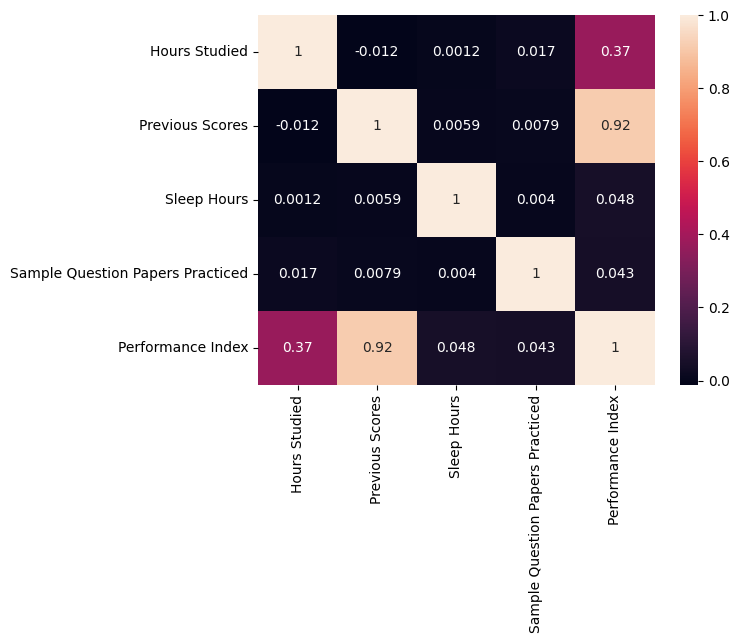

In [127]:

sns.heatmap(corr,annot=True)
plt.show()
#correlation between the features 1 indicates perfect correlation and o indicates not correlated

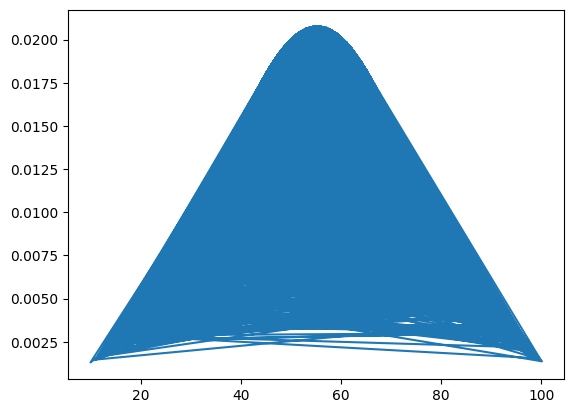

In [128]:
mean = statistics.mean(mlr_dataset['Performance Index']) #mean of the target data
sd = statistics.stdev(mlr_dataset['Performance Index'])#standard deviation of the target data
plt.plot(mlr_dataset['Performance Index'], norm.pdf(mlr_dataset['Performance Index'], mean, sd))
plt.show()
#the target value is normally distributed

In [129]:
label = LabelEncoder() # converting categorical values to numerical as the data set is having extracicular activities column yes or no
mlr_dataset['Extracurricular Activities'] =label.fit_transform(mlr_dataset['Extracurricular Activities'])

In [130]:
mlr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [131]:
mlr_features=mlr_dataset.drop(['Performance Index'],axis=1)
mlr_target=mlr_dataset['Performance Index']

In [132]:
mlr_features.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [133]:
mlr_target.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [134]:
X_train,X_test,y_train,y_test = train_test_split(mlr_features,mlr_target,test_size=0.25)

In [135]:
mlr_model=LinearRegression()
mlr_model.fit(X_train,y_train)

LinearRegression()

In [136]:
mlr_predict= mlr_model.predict(X_test)

In [137]:
r2score=r2_score(mlr_predict,y_test)

In [155]:
print(X_train.shape,y_test.shape)

(7500, 5) (2500,)


In [96]:
print("Traing data score: ",str(round((mlr_model.score(X_train,y_train)*100),0))+"%")
print("Testing data score: ",str(round((mlr_model.score(X_test,y_test)*100),0))+"%")
print("r2_score between predicted values and orginal values score: ",str(round(r2score*100,0))+'%')
print("mean squared error: ",mean_squared_error(y_test,mlr_predict))

Traing data score:  99.0%
Testing data score:  99.0%
r2_score between predicted values and orginal values score:  99.0%
mean squared error:  4.1565891720074815


In [173]:
print("Actual observations: ",np.array(y_test[:5])) # first 5 actual values
list1=[]
for i in mlr_predict[:5]:
  i=round(i,0)
  list1.append(i)
print("predicted observation: ",list1) # first 5 predicted values

Actual observations:  [74. 41. 76. 25. 43.]
predicted observation:  [73.0, 43.0, 78.0, 27.0, 45.0]


In [174]:
[round(i,0) for i in mlr_predict[:5]]

[73.0, 43.0, 78.0, 27.0, 45.0]

In [175]:
print("Actual observations: ",np.array(y_test[:5])) # first 5 actual values
print("predicted observation: ",[round(i,0) for i in mlr_predict[:5]]) # first 5 predicted values using list comprehension

Actual observations:  [74. 41. 76. 25. 43.]
predicted observation:  [73.0, 43.0, 78.0, 27.0, 45.0]
